## Current Industry Practices and the Role of Logistic Regression in Mental Health
```Logistic regression is a widely used machine learning technique in the healthcare industry for predicting binary outcomes, such as the presence or absence of depression. It is favored for its simplicity, interpretability, and effectiveness in handling structured clinical data. In practice, logistic regression models utilize patient demographics, lifestyle factors, medical history, and psychological assessments to predict depression risk, supporting early diagnosis and personalized treatment plans in clinical settings.```

## Research Landscape and Recent Developments in Depression Prediction
```Recent studies demonstrate the effectiveness of logistic regression models in accurately predicting depression by identifying significant risk factors such as age, sleep patterns, and physical activity. For instance, research by Smith et al. (2022) and Zhang et al. (2023) showed logistic regression models achieving high accuracy in depression classification. These models are praised for their ability to provide clear, interpretable results that can be easily communicated to healthcare professionals for clinical decision-making.```

## Challenges, Limitations, and Future Directions
```While logistic regression is a robust tool for depression prediction, challenges such as handling multicollinearity, feature scaling, and dealing with missing data can affect model performance. Recent literature explores techniques like regularization and data imputation to overcome these limitations. The field is also moving towards integrating logistic regression with advanced machine learning methods to enhance predictive accuracy while maintaining interpretability, addressing the evolving needs of precision mental health care.```

|    | Variable Name                | Type        | Description                                                  | Values                                                                 |
|---:|:-----------------------------|:------------|:-------------------------------------------------------------|:-----------------------------------------------------------------------|
|  0 | Age                          | Numerical   | The age of the individual.                                   | Numbers                                                                |
|  1 | Marital Status               | Categorical | The marital status of the individual.                        | Married, Single, Widowed, Divorced                                     |
|  2 | Education Level              | Categorical | The highest level of education attained by the individual.   | Bachelor's Degree, High School, Associate Degree, Master's Degree, PhD |
|  3 | Number of Children           | Numerical   | The number of children the individual has.                   | 0, 1, 2, 3, 4                                                          |
|  4 | Smoking Status               | Categorical | Whether the individual smokes.                               | Non-smoker, Former, Current                                            |
|  5 | Physical Activity Level      | Categorical | The level of physical activity engaged in by the individual. | Sedentary, Moderate, Active                                            |
|  6 | Employment Status            | Categorical | The current employment status of the individual.             | Employed, Unemployed                                                   |
|  7 | Income                       | Numerical   | The annual income of the individual.                         | Numbers                                                                |
|  8 | Alcohol Consumption          | Categorical | The level of alcohol consumption by the individual.          | Moderate, Low, High                                                    |
|  9 | Dietary Habits               | Categorical | The eating habits of the individual.                         | Unhealthy, Moderate, Healthy                                           |
| 10 | Sleep Patterns               | Categorical | The sleep patterns of the individual.                        | Fair, Poor, Good                                                       |
| 11 | History of Mental Illness    | Categorical | Whether the individual has a history of mental illness.      | No, Yes                                                                |
| 12 | History of Substance Abuse   | Categorical | Whether the individual has a history of substance abuse.     | No, Yes                                                                |
| 13 | Family History of Depression | Categorical | Whether there is a family history of depression.             | No, Yes                                                                |
| 14 | Depression                   | Categorical | Whether the individual has any chronic medical conditions.   | No, Yes                                                                |
| 15 | Name                         | Object      | Name of Individual                                           | —                                                                      |

## Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import sklearn
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_fscore_support, accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import VotingClassifier
from matplotlib.colors import ListedColormap
import pickle, pyarrow

import time

In [2]:
import pyarrow as pa
import pyarrow.parquet as pq

file = pd.read_csv("depression_data.csv")
table = pa.Table.from_pandas(file)
pq.write_table(table, "depression_data.parquet")

In [3]:
print("pandas==", pd.__version__, sep="")
print("numpy==", np.__version__, sep="")
print("seaborn==", sns.__version__, sep="")
print("matplotlib==", matplotlib.__version__, sep="")
print("scikit-learn==", sklearn.__version__, sep="")
print("pyarrow==", pyarrow.__version__, sep="")



pandas==2.2.2
numpy==2.0.1
seaborn==0.13.2
matplotlib==3.9.1
scikit-learn==1.5.1
pyarrow==17.0.0


###
---
###

## Tell Time  - Decorator for calculating the time

In [4]:
def tell_time(function, *args, **kwargs):
    def wrapper(*args, **kwargs):
        start = time.time()
        done = function(*args, **kwargs)
        print(f"{function.__name__}() function took - {(time.time()-start)//60} Mins {(time.time()-start)%60:.3f} Sec")
        return done
    return wrapper

In [5]:
@tell_time
def read_csv_data(file):
    return pd.read_csv(file)

In [6]:
@tell_time
def read_parquet_data(file):
    return pd.read_parquet(file)

###
---
###

## Reading the Dataset

In [7]:
csv_df = read_csv_data("depression_data.csv")

read_csv_data() function took - 0.0 Mins 0.614 Sec


In [8]:
parquet_df = read_parquet_data("depression_data.parquet")

read_parquet_data() function took - 0.0 Mins 0.750 Sec


In [9]:
df = parquet_df

In [10]:
df.rename(columns={"Chronic Medical Conditions":"Depression"}, inplace=True)

In [11]:
df.head(3)

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Depression
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No


###
---
###

## Inspection of Dataset 

In [12]:
df.shape

(413768, 16)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

In [14]:
df["Number of Children"].value_counts()

Number of Children
0    155232
2     83961
1     83925
3     76974
4     13676
Name: count, dtype: int64

In [15]:
df["Number of Children"] = df["Number of Children"].astype("object")

###
---
###

## Statistical Inferences - 5 Point Summary & describe

In [16]:
df.describe(include="number")

,Age,Income
count,413768.000000,413768.000000
mean,49.000713,50661.707971
std,18.158759,40624.100565
min,18.000000,0.410000
25%,33.000000,21001.030000
50%,49.000000,37520.135000
75%,65.000000,76616.300000
max,80.000000,209995.220000


In [17]:
df.describe(exclude="number")

,Name,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Depression
count,413768,413768,413768,413768,413768,413768,413768,413768,413768,413768,413768,413768,413768,413768
unique,196851,4,5,5,3,3,2,3,3,3,2,2,2,2
top,Michael Smith,Married,Bachelor's Degree,0,Non-smoker,Sedentary,Employed,Moderate,Unhealthy,Fair,No,No,No,No
freq,198,240444,124329,155232,247416,176850,265659,173440,170817,196789,287943,284880,302515,277561


###
---
###

## Cleaning the Data - Nulls & Duplicates

In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
df.isnull().sum()

Name                            0
Age                             0
Marital Status                  0
Education Level                 0
Number of Children              0
Smoking Status                  0
Physical Activity Level         0
Employment Status               0
Income                          0
Alcohol Consumption             0
Dietary Habits                  0
Sleep Patterns                  0
History of Mental Illness       0
History of Substance Abuse      0
Family History of Depression    0
Depression                      0
dtype: int64

In [20]:
df.drop("Name", axis=1, inplace=True)

###
---
###

## Plots

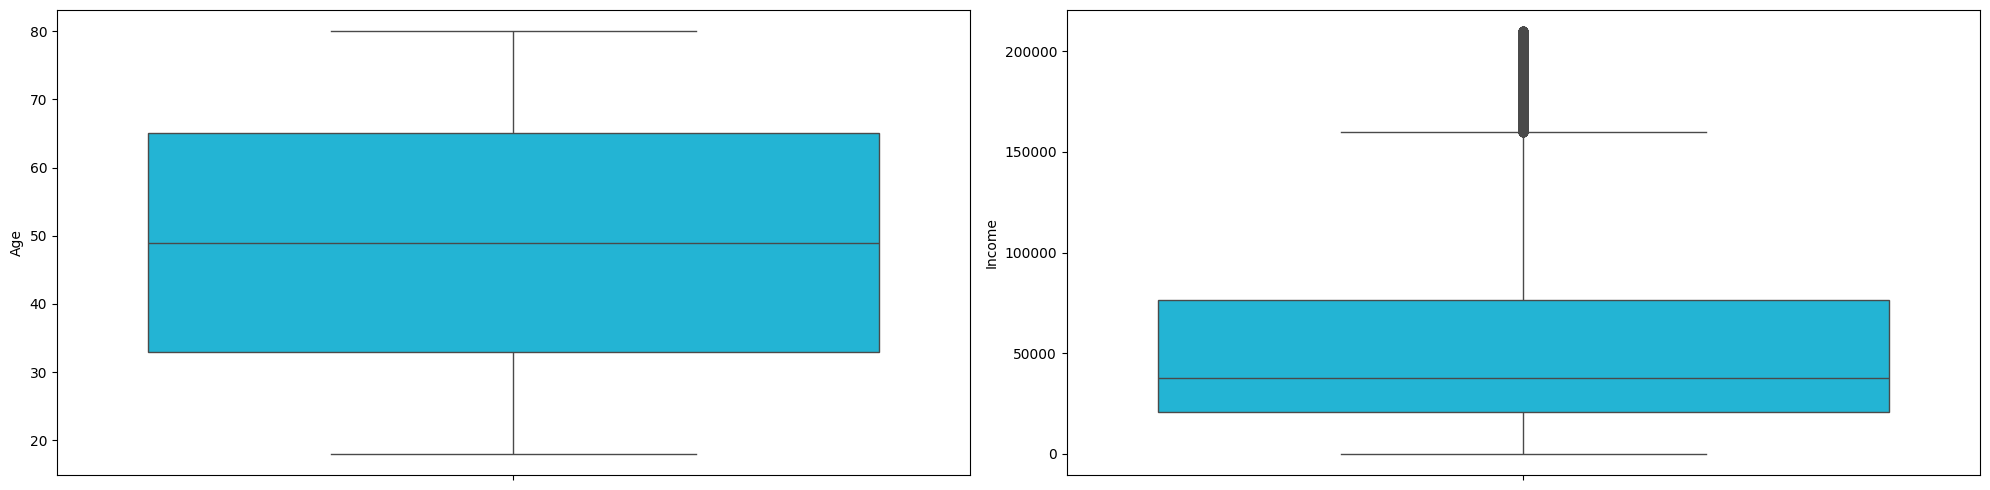

In [21]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

for feature, ax_object in zip(df.select_dtypes(include="number").columns, ax.flatten()):
    sns.boxplot(df[feature], ax=ax_object, color="#05C7F2")


plt.tight_layout()
plt.show()

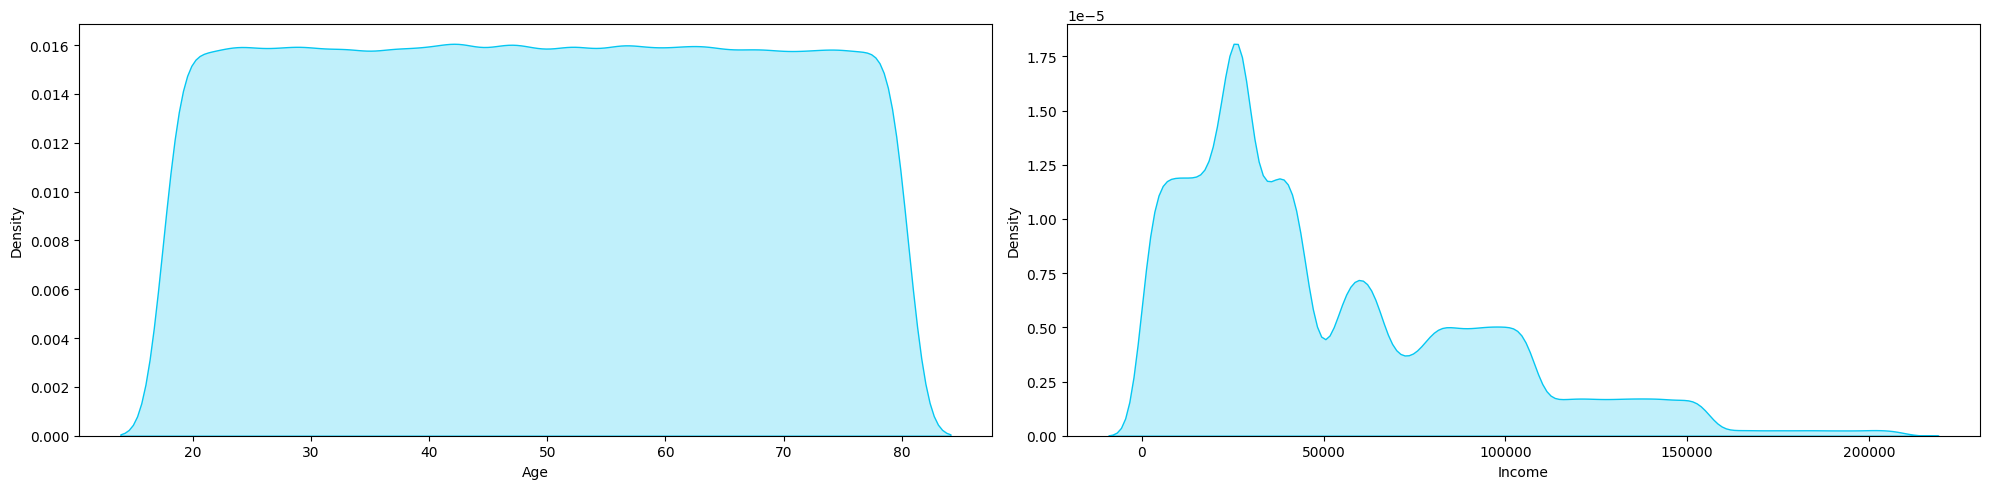

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,5))

for feature, ax_object in zip(df.select_dtypes(include="number").columns, ax.flatten()):
    sns.kdeplot(df[feature], ax=ax_object, fill=True, color="#05C7F2")


plt.tight_layout()
plt.show()

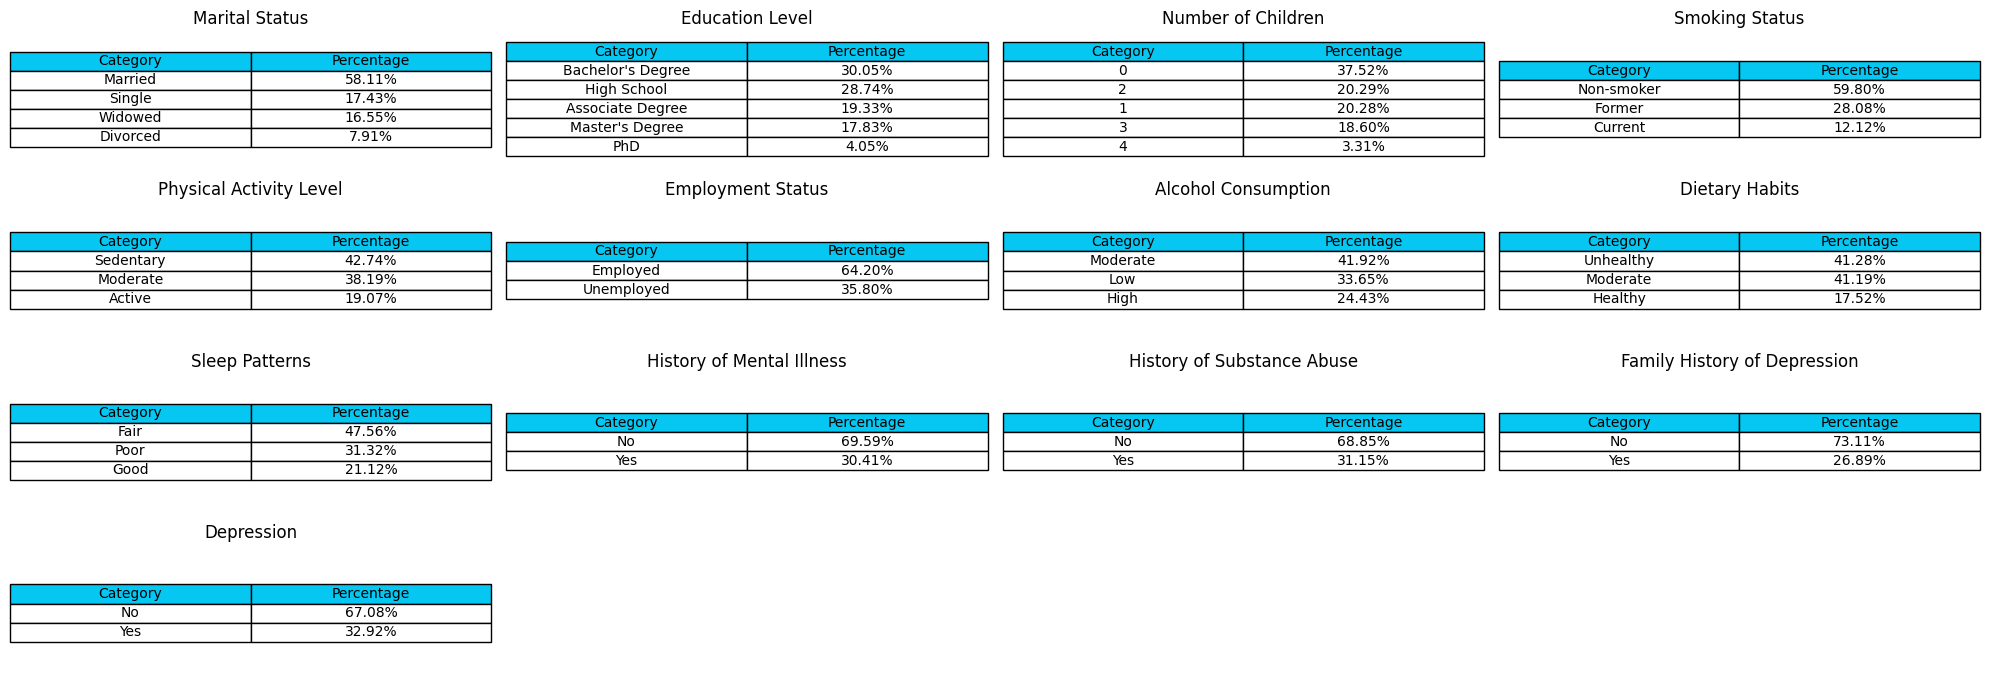

In [23]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 7))

for i in range(13):
        
    feature = ['Marital Status', 'Education Level', 'Number of Children',
       'Smoking Status', 'Physical Activity Level', 'Employment Status',
       'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns',
       'History of Mental Illness', 'History of Substance Abuse',
       'Family History of Depression', 'Depression']
    
    category = df[feature[i]].value_counts().index
    percentage = [f"{i:.2f}%" for i in (df[feature[i]].value_counts().values/df.shape[0])*100]
    
    f_table = pd.DataFrame({"Category":category, "Percentage":percentage})

    axes[i//4, i%4].axis('tight')
    axes[i//4, i%4].axis('off')
    axes[i//4, i%4].table(cellText=f_table.values, colLabels=f_table.columns, loc="center", cellLoc="center", fontsize=15, colColours=["#05C7F2"]*13)
    axes[i//4, i%4].set_title(feature[i])



axes[3, 1].axis('off')
axes[3, 2].axis('off')
axes[3, 3].axis('off')

plt.tight_layout()
plt.show()

###
---
###

## Hypothosis Testing

In [24]:
from scipy.stats import chi2_contingency, mannwhitneyu, chi2

# `H0 : There is no relationship among two variables`

# `H1 : There is relationship among two variables`

In [25]:
hypo_test = {}
nums = ["Age", "Income"]

for i in parquet_df.columns:
    if i in nums:
        mini_df = parquet_df[["Depression", i]]
        cat_one = mini_df[mini_df["Depression"] == "No"][i]
        cat_two = mini_df[mini_df["Depression"] == "Yes"][i]
        test = mannwhitneyu(cat_one, cat_two)
        hypo_test[i] = {"Statistic":test[0], "P-Value":test[1]}
    else:
        test = chi2_contingency(pd.crosstab(parquet_df["Depression"], parquet_df[i]))
        hypo_test[i] = {"Statistic":test[0], "P-Value":test[1]}

hypo_test.pop("Depression")

statistic = [i["Statistic"] for i in hypo_test.values()]
p_Value = [i["P-Value"] for i in hypo_test.values()]

In [26]:
a = pd.DataFrame(data={
    "Target Variable":["Depression (2 Categories)"]*14,
    "Another Variable":['Age (Numerical)', 'Marital Status (4 Categories)', 'Education Level (5 Categories)', 'Number of Children (5 Categories)',
       'Smoking Status (3 Categories)', 'Physical Activity Level (3 Categories)', 'Employment Status (2 Categories)',
       'Income (Numerical)', 'Alcohol Consumption (3 Categories)', 'Dietary Habits (3 Categories)', 'Sleep Patterns (3 Categories)',
       'History of Mental Illness (2 Categories)', 'History of Substance Abuse (2 Categories)',
       'Family History of Depression (2 Categories)'],
    "Type of Hypothisis Test":['Mann-Whitney U Test', 'Chi-Square Test', 'Chi-Square Test', 'Chi-Square Test', 'Chi-Square Test', 'Chi-Square Test',
                               'Chi-Square Test','Mann-Whitney U Test', 'Chi-Square Test', 'Chi-Square Test', 'Chi-Square Test', 'Chi-Square Test', 'Chi-Square Test', 'Chi-Square Test'],
    "Statistic":statistic,
    "P-Value":p_Value,
    "Relationship":["There is a relationship" if i<0.05 else "No relationship" for i in p_Value]
  

})
# a
# print(a.to_markdown())

|    | Target Variable           | Another Variable                            | Type of Hypothisis Test   |      Statistic |      P-Value | Relationship            |
|---:|:--------------------------|:--------------------------------------------|:--------------------------|---------------:|-------------:|:------------------------|
|  0 | Depression (2 Categories) | Age (Numerical)                             | Mann-Whitney U Test       |    1.93121e+10 | 8.65343e-30  | There is a relationship |
|  1 | Depression (2 Categories) | Marital Status (4 Categories)               | Chi-Square Test           |   66.9861      | 1.88552e-14  | There is a relationship |
|  2 | Depression (2 Categories) | Education Level (5 Categories)              | Chi-Square Test           |    4.92712     | 0.294857     | No relationship         |
|  3 | Depression (2 Categories) | Number of Children (5 Categories)           | Chi-Square Test           |   37.4444      | 1.45881e-07  | There is a relationship |
|  4 | Depression (2 Categories) | Smoking Status (3 Categories)               | Chi-Square Test           | 1166.17        | 5.8947e-254  | There is a relationship |
|  5 | Depression (2 Categories) | Physical Activity Level (3 Categories)      | Chi-Square Test           |  527.441       | 2.93487e-115 | There is a relationship |
|  6 | Depression (2 Categories) | Employment Status (2 Categories)            | Chi-Square Test           |  744.135       | 7.56388e-164 | There is a relationship |
|  7 | Depression (2 Categories) | Income (Numerical)                          | Mann-Whitney U Test       |    1.97126e+10 | 2.13549e-111 | There is a relationship |
|  8 | Depression (2 Categories) | Alcohol Consumption (3 Categories)          | Chi-Square Test           |  106.272       | 8.38038e-24  | There is a relationship |
|  9 | Depression (2 Categories) | Dietary Habits (3 Categories)               | Chi-Square Test           |  114.2         | 1.59109e-25  | There is a relationship |
| 10 | Depression (2 Categories) | Sleep Patterns (3 Categories)               | Chi-Square Test           |  123.653       | 1.40935e-27  | There is a relationship |
| 11 | Depression (2 Categories) | History of Mental Illness (2 Categories)    | Chi-Square Test           |   15.0563      | 0.000104351  | There is a relationship |
| 12 | Depression (2 Categories) | History of Substance Abuse (2 Categories)   | Chi-Square Test           |    4.50934     | 0.0337103    | There is a relationship |
| 13 | Depression (2 Categories) | Family History of Depression (2 Categories) | Chi-Square Test           |    2.12851     | 0.144581     | No relationship         |

In [27]:
df = parquet_df.copy()
df.drop(columns=["Education Level", "Family History of Depression"], inplace=True)

In [28]:
df.head()

,Age,Marital Status,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Depression
0,31,Married,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes
1,55,Married,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,Yes
2,78,Widowed,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,No
3,58,Divorced,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No
4,18,Single,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes


###
---
###

## Spliting the data

In [29]:
le_object = LabelEncoder()
df["Depression"] = le_object.fit_transform(df["Depression"])
raw_df = df
target = df["Depression"]
df = df.drop(columns="Depression")

In [30]:
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.05, random_state=5)

In [31]:
print(f'''
x_train shape : {x_train.shape}
x_test shape : {x_test.shape}
y_train shape : {y_train.shape}
y_test shape : {y_test.shape}
''')


x_train shape : (393079, 12)
x_test shape : (20689, 12)
y_train shape : (393079,)
y_test shape : (20689,)



###
---
###

## Transformation

###
---
###

## Scaling

In [32]:
x_train.select_dtypes(include="number").head(5)

,Age,Income
13513,49,104852.57
324041,59,24365.22
144337,78,29327.34
250003,43,27478.55
47584,75,9891.63


In [33]:
scaler_objects = {}
def do_scaling(x_train, x_test, scaler_object=MinMaxScaler()):


    for i in x_train.select_dtypes(include="number").columns:
        scaler_objects[i] = MinMaxScaler()
        scaler_objects[i].fit(x_train[[i]])
        x_train[i] = scaler_objects[i].transform(x_train[[i]])

    for i in x_test.select_dtypes(include="number").columns:
        x_test[i] = scaler_objects[i].transform(x_test[[i]])

    return x_train, x_test

In [34]:
x_train, x_test = do_scaling(x_train=x_train, x_test=x_test)

In [35]:
x_train.head()

,Age,Marital Status,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse
13513,0.500000,Married,1,Current,Moderate,Employed,0.499308,High,Unhealthy,Poor,No,No
324041,0.661290,Married,1,Non-smoker,Sedentary,Employed,0.116026,Moderate,Moderate,Fair,Yes,Yes
144337,0.967742,Married,3,Non-smoker,Moderate,Employed,0.139655,Moderate,Moderate,Fair,No,Yes
250003,0.403226,Married,1,Former,Sedentary,Unemployed,0.130852,High,Moderate,Poor,Yes,No
47584,0.919355,Widowed,2,Former,Moderate,Unemployed,0.047102,High,Unhealthy,Poor,Yes,No


In [36]:
x_test.head()

,Age,Marital Status,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse
366559,0.080645,Married,2,Non-smoker,Active,Unemployed,0.138907,Moderate,Healthy,Fair,No,No
66432,0.129032,Single,0,Current,Sedentary,Employed,0.354114,High,Unhealthy,Fair,Yes,Yes
243274,0.935484,Married,2,Non-smoker,Moderate,Employed,0.613201,High,Healthy,Poor,No,No
209153,0.096774,Married,1,Non-smoker,Active,Employed,0.410786,Low,Healthy,Poor,No,No
394294,0.919355,Married,1,Non-smoker,Moderate,Employed,0.416343,Moderate,Healthy,Fair,No,No


In [37]:
# scaler_objects = {}

# for i in x_train.select_dtypes(include="number").columns:
#     scaler_objects[i] = MinMaxScaler()
#     scaler_objects[i].fit(x_train[[i]])
#     x_train[i] = scaler_objects[i].transform(x_train[[i]])

In [38]:
x_train.select_dtypes(include="number").head(5)

,Age,Income
13513,0.500000,0.499308
324041,0.661290,0.116026
144337,0.967742,0.139655
250003,0.403226,0.130852
47584,0.919355,0.047102


In [39]:
for i in x_test.select_dtypes(include="number").columns:
    x_test[i] = scaler_objects[i].transform(x_test[[i]])

###
---
###

## Encoding

In [40]:
new_df = x_train.select_dtypes(include="number")
new_df.reset_index(inplace=True)
encoder_objects = {}

for i in x_train.select_dtypes(exclude="number").columns:
    # print(i)
    encoder_objects[i] = OneHotEncoder(dtype='int', drop="first")
    dummy_df = encoder_objects[i].fit_transform(x_train[[i]]).toarray()
    new_df = pd.concat([new_df, pd.DataFrame(dummy_df, columns=encoder_objects[i].get_feature_names_out())], axis=1)
    # print(new_df)

x_train = new_df

In [41]:
new_df = x_test.select_dtypes(include="number")
new_df.reset_index(inplace=True)

for i in x_test.select_dtypes(exclude="number").columns:
    dummy_df = encoder_objects[i].transform(x_test[[i]]).toarray()
    new_df = pd.concat([new_df, pd.DataFrame(dummy_df, columns=encoder_objects[i].get_feature_names_out())], axis=1)
    # print(new_df)

x_test = new_df

In [42]:
x_train.drop(columns="index", inplace=True)
x_test.drop(columns="index", inplace=True)

###
---
###

## Base Model - Logistic Regression

In [43]:
def get_metrics(model, x_test, y_test):
    '''
    Parameters:
    ------------------------
    model : ML Model Object i.e., LiniearRegression()
    
    x_test : Featuers Testing DataFrame from train_test_split()
    
    y_test : Target Testing DataFrame from train_test_split()
    
    ________________________
    Returns:
    ------------------------
    subplots(3) : Clasification Report, Confusion Matrix, ROC-AUC Curve


    _____________________________________________________________
    
    '''
    y_pred = model.predict(x_test)
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

    model_name = model if len(str(model)) <= 50 else str(model)[:50]+"...)"
    fig.suptitle(f"\nClassification Metrics for {model_name}\n", fontsize=30)
    
    ##########################################################################################################
    cr = pd.DataFrame(classification_report(y_test, y_pred, output_dict=True)).T.iloc[:, :3]
    accuracy = round((float(cr.loc["accuracy"][0]))*100, 2)
    t = cr.iloc[[0,1,3,4], :]
    t.loc[["macro avg", "weighted avg"]] = t.loc[["macro avg", "weighted avg"]]*100
    t = round(t, 2)
    
    axes[0].axis('tight')
    axes[0].axis('off')
    t = axes[0].table(cellText=t.values, colLabels=t.columns, rowLabels=t.index, loc="center", cellLoc="center", rowLoc='right', fontsize=5, colColours=['#05C7F2']*3, rowColours=["#BCB7B1"]*4, colWidths=[0.25]*3)
    t.scale(1, 3)
    axes[0].set_title(f"Classification Report\n", fontsize=15)
    axes[0].text(x=-0.018, y=0.035, s=f"Accuracy : {accuracy}%", fontsize=15)
    ##########################################################################################################
    ##########################################################################################################
    ##########################################################################################################
    ##########################################################################################################
    l = np.array(["True Negative", "False Positive", "False Negative", "True Positive"])
    cm = confusion_matrix(y_test, y_pred)
    c = cm.flatten()
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=np.array([f"{i}\n{j:,}" for i, j in zip(l, c)]).reshape(2,2), fmt="", cbar=False, ax=axes[1], cmap = ListedColormap(['#05C7F2']), linewidths = 1, annot_kws = {'size':15})
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            if i != j:  # Check if not diagonal
                # Set cell background to white
                rect = plt.Rectangle((j, i), 1, 1, facecolor='#BCB7B1')
                axes[1].add_patch(rect)
    axes[1].set_xlabel("Predicted Values")
    axes[1].set_ylabel("Actual Values")
    axes[1].axis('tight')
    axes[1].set_title(f"Confusion Matrix\n", fontsize=15)
    ##########################################################################################################
    ##########################################################################################################
    ##########################################################################################################    
    ##########################################################################################################
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(x_test)[:,1])
    axes[2].plot(fpr, tpr, color='#05C7F2', label=f"ROC-AUC Score\n              {roc_auc_score(y_test, model.predict_proba(x_test)[:,1]):.4f}", fillstyle="full")
    axes[2].plot([0, 1], [0, 1],color='#A19C95', linestyle='dashed')
    axes[2].fill_between(fpr, tpr, alpha=0.5, color='#BCB7B1')
    axes[2].set_xlabel("False Postive Rate")
    axes[2].set_ylabel("True Postive Rate")
    axes[2].legend(loc="upper left")
    axes[2].set_title(f"ROC-AUC Curve\n", fontsize=15)
    ##########################################################################################################
    
    plt.tight_layout()
    plt.show()

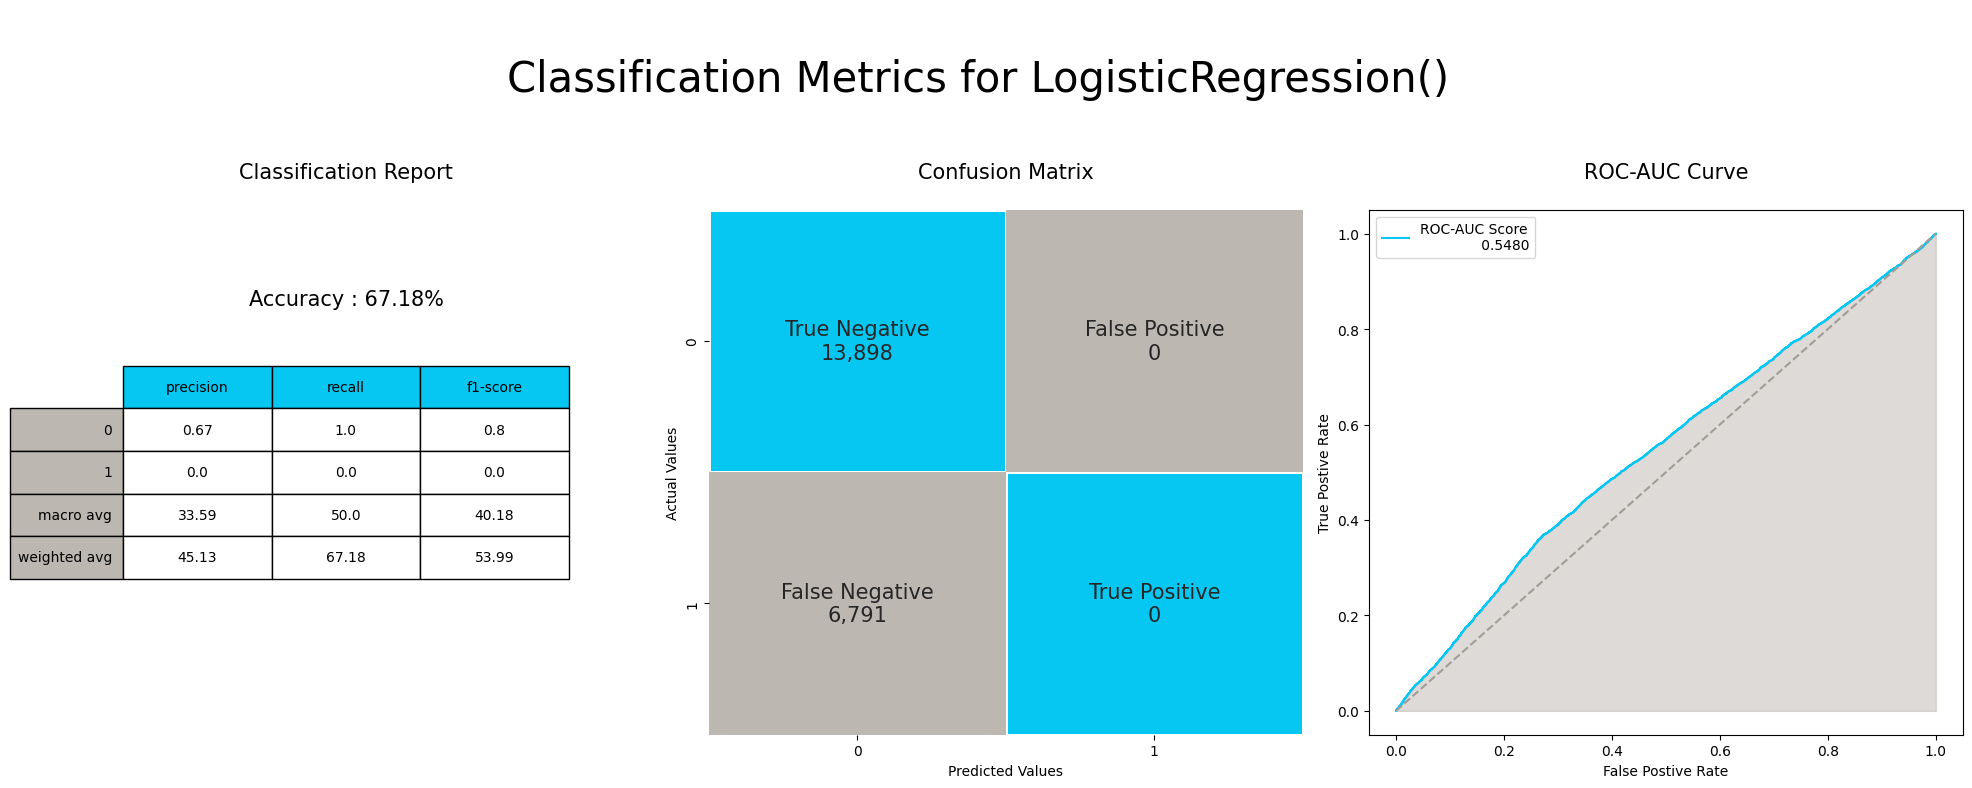

In [44]:
model = LogisticRegression().fit(x_train, y_train)
get_metrics(model, x_test, y_test)

###
---
###

In [45]:
from sklearn.tree import DecisionTreeClassifier

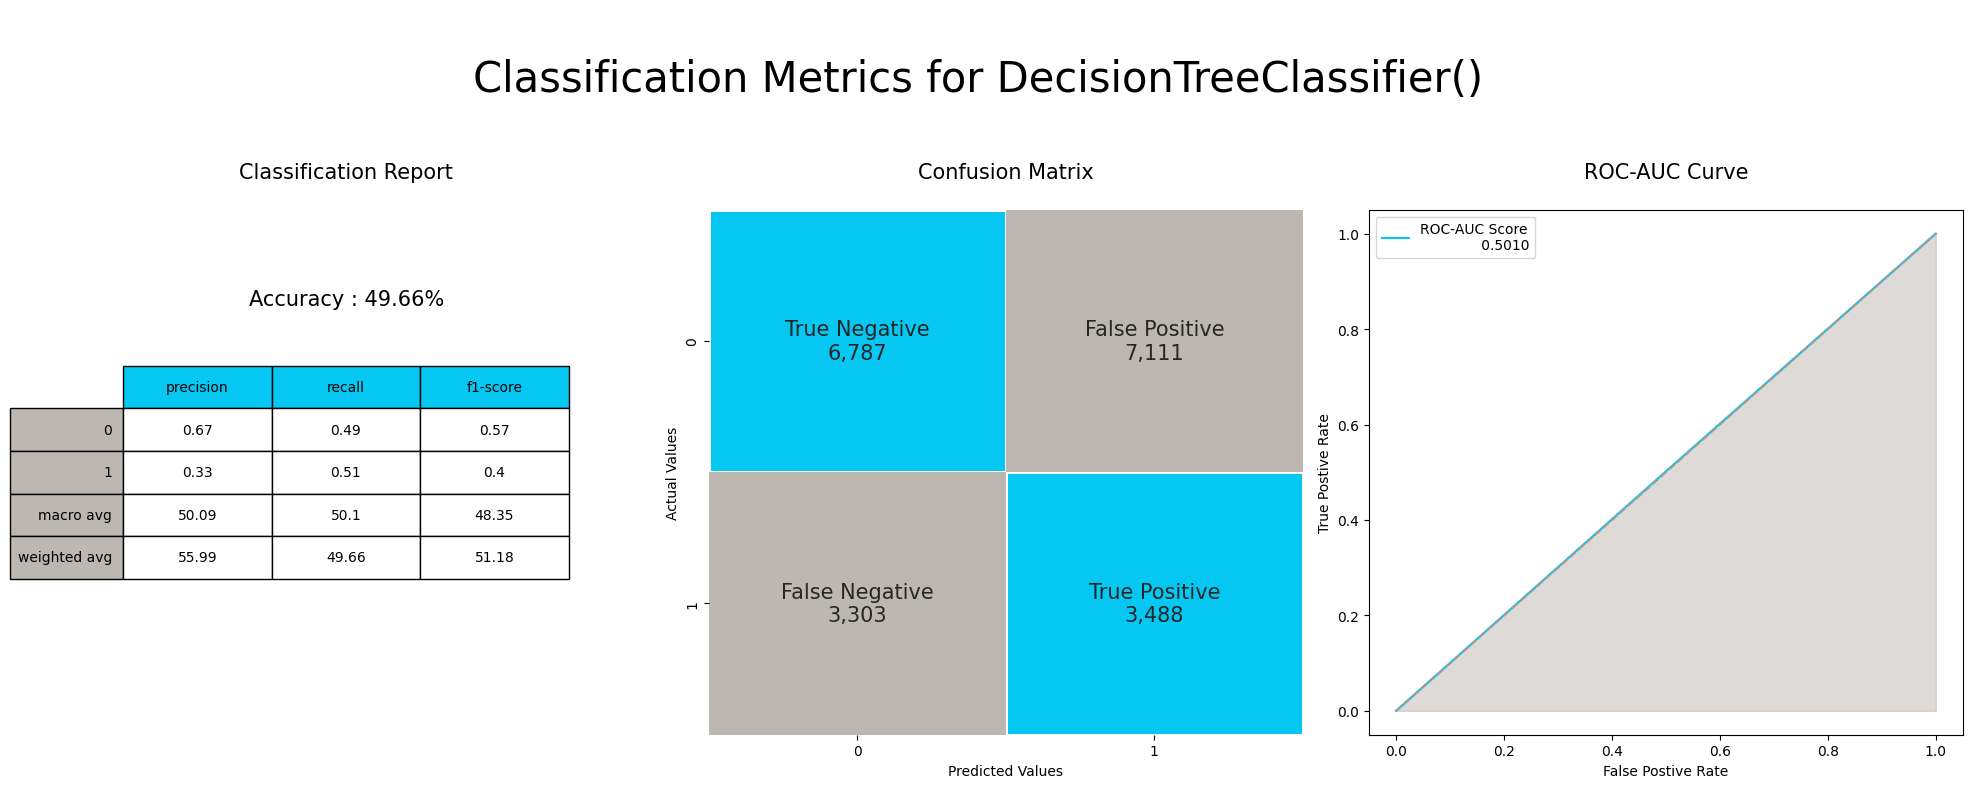

In [46]:
model = DecisionTreeClassifier().fit(x_train, y_train)
get_metrics(model, x_test, y_test)

###
---
###

In [47]:
from sklearn.ensemble import RandomForestClassifier

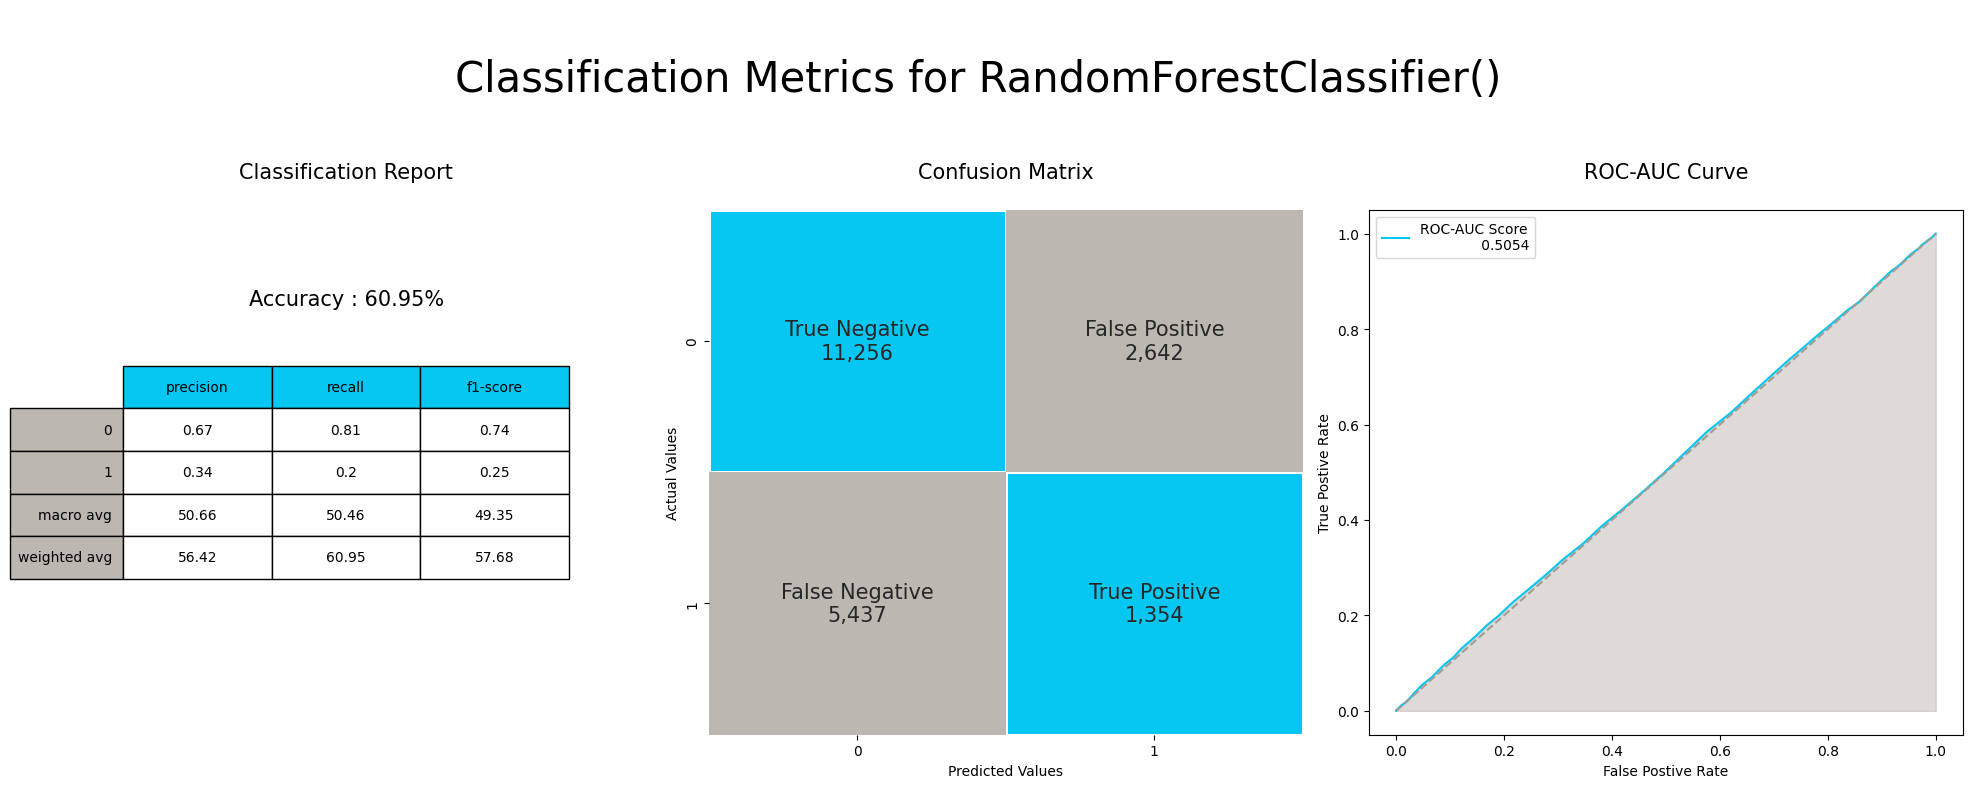

In [48]:
model = RandomForestClassifier().fit(x_train, y_train)
get_metrics(model, x_test, y_test)

###
---
###

In [49]:
from xgboost.sklearn import XGBClassifier

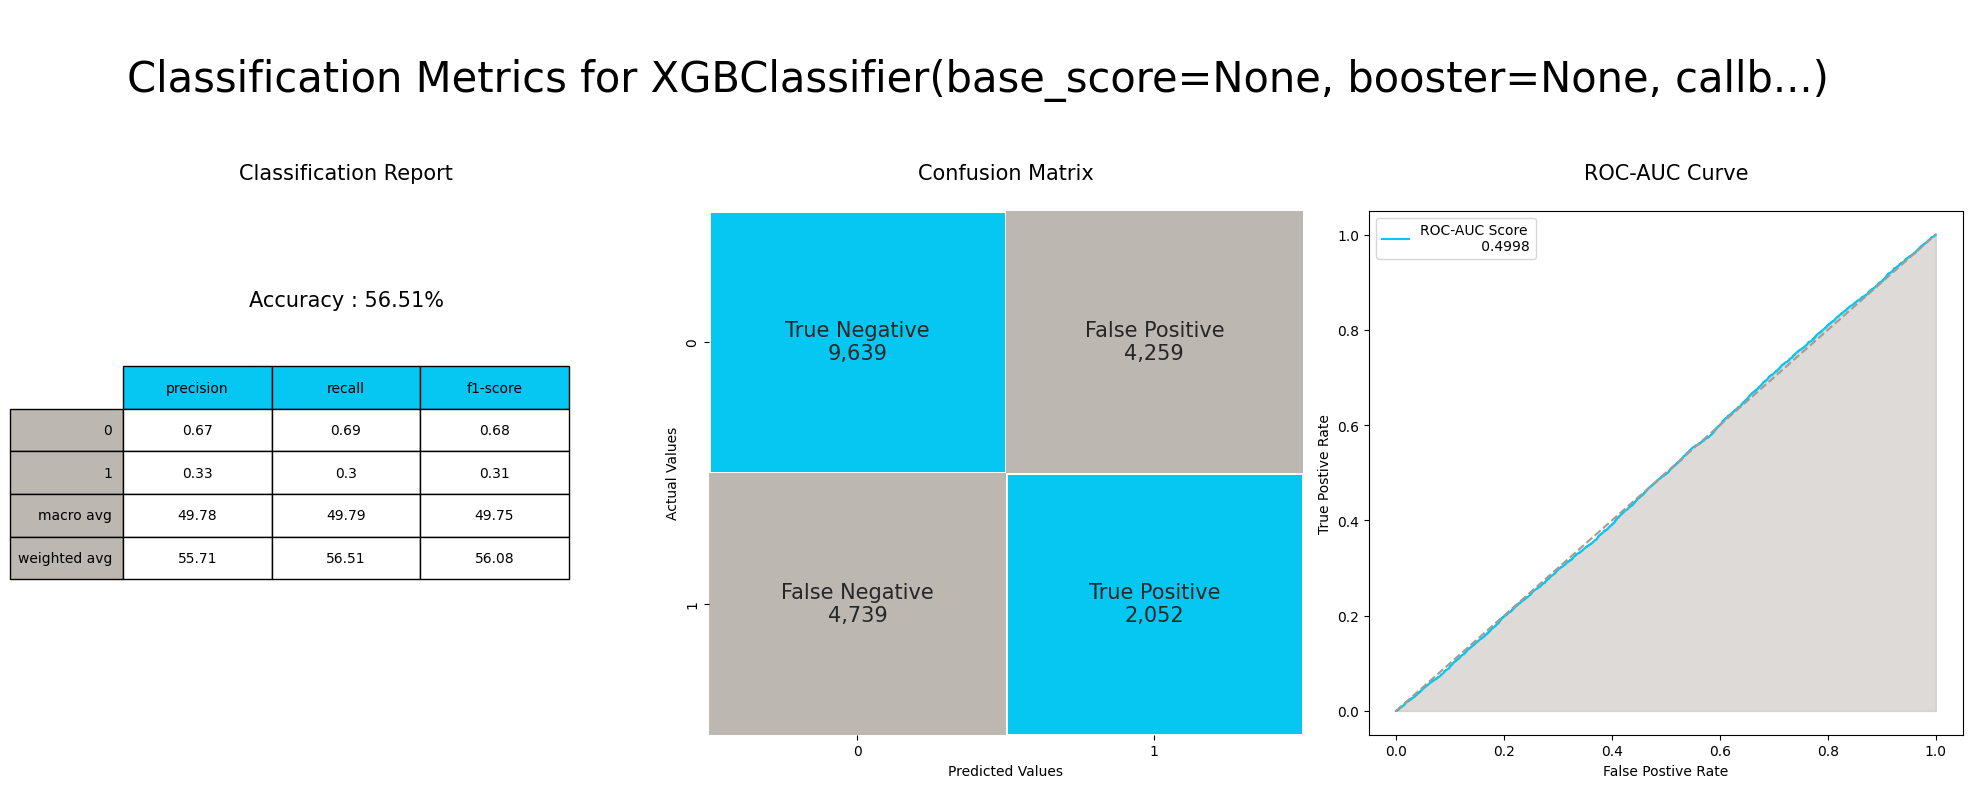

In [50]:
model = XGBClassifier().fit(x_train, y_train)
get_metrics(model, x_test, y_test)

###
---
###

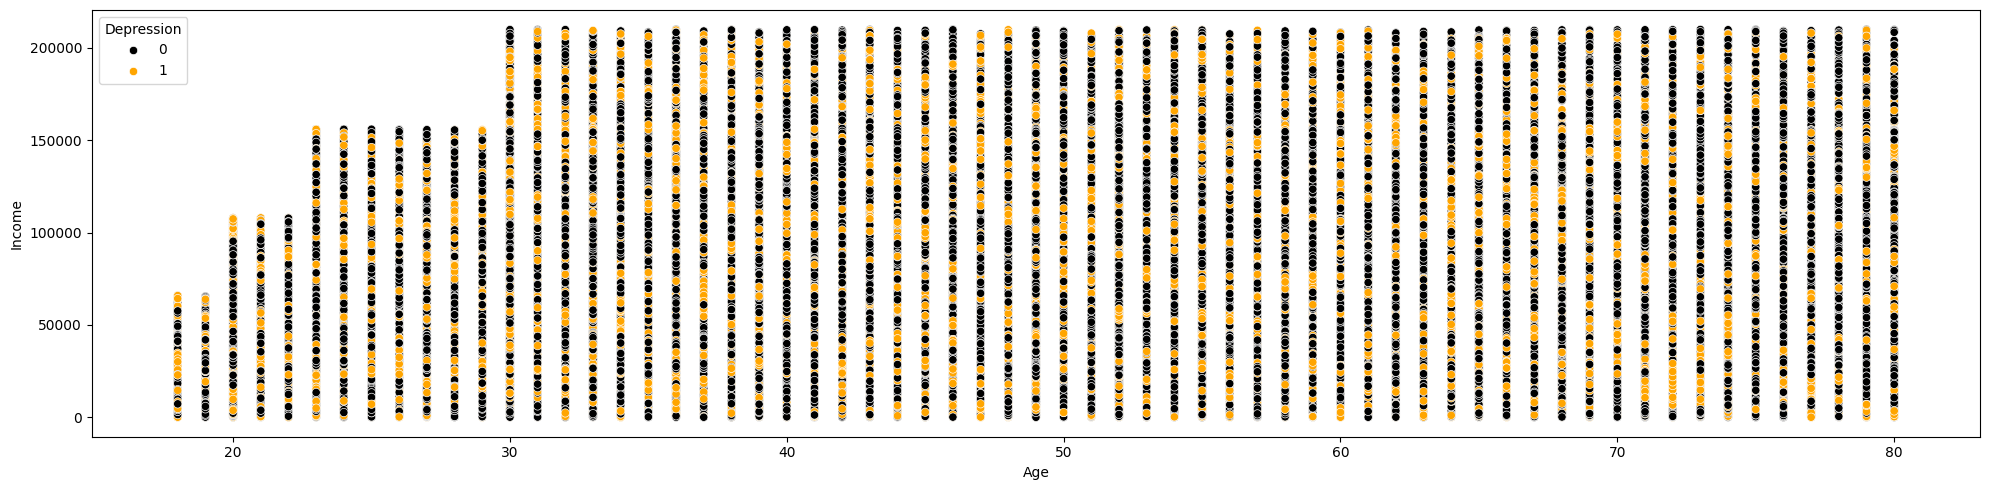

In [51]:
plt.figure(figsize=(20,5))

sns.scatterplot(x=raw_df['Age'], y=raw_df['Income'], hue=raw_df["Depression"], palette=["Black", "Orange"])

plt.tight_layout()
plt.show()

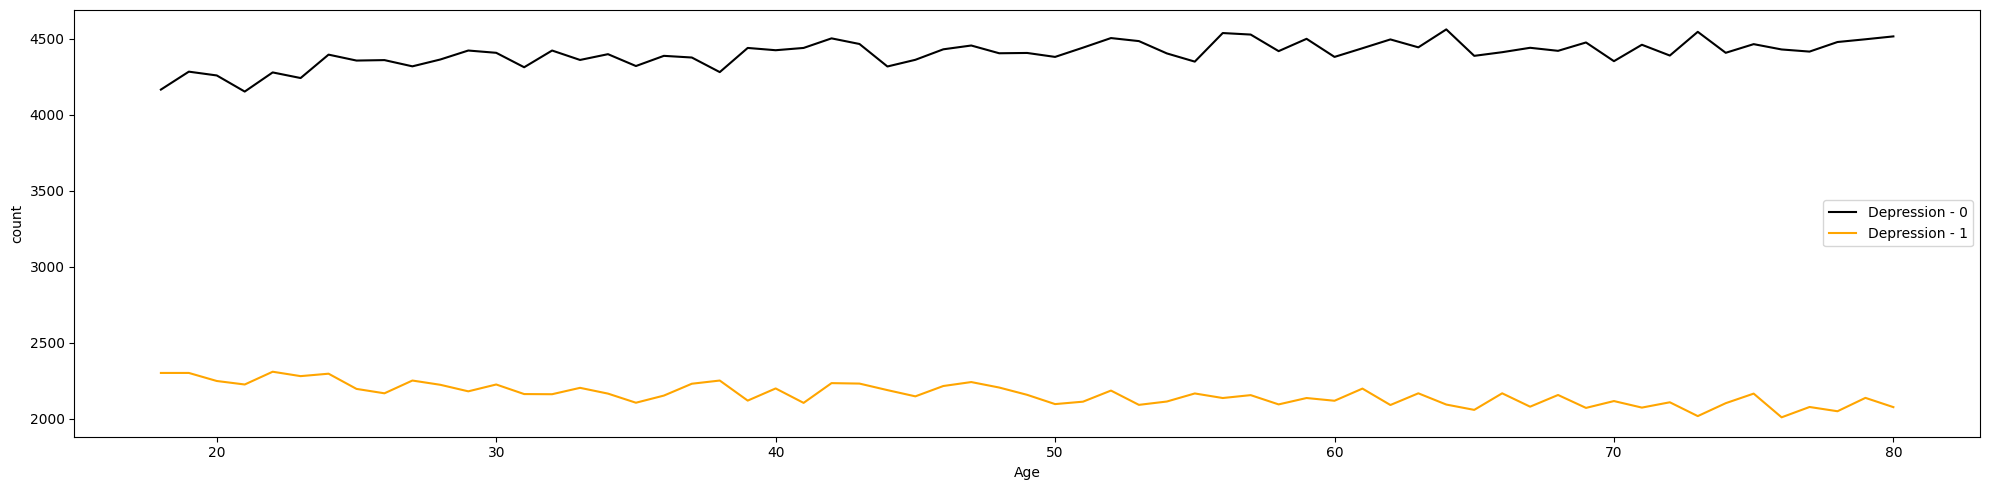

In [52]:
plt.figure(figsize=(20,5))

sns.lineplot(raw_df[raw_df["Depression"] == 0]["Age"].value_counts(), color="BLack", errorbar=None, label="Depression - 0")
sns.lineplot(raw_df[raw_df["Depression"] == 1]["Age"].value_counts(), color="Orange", errorbar=None, label="Depression - 1")

plt.legend(loc="center right")
plt.tight_layout()
plt.show()

In [53]:
dummy_df = parquet_df.select_dtypes(include="number")

In [54]:
for i in parquet_df.select_dtypes(exclude="number").columns:
    dummy_df[i] = LabelEncoder().fit_transform(parquet_df[i])

In [55]:
# a = OneHotEncoder(drop="first").fit(parquet_df.select_dtypes(exclude="number"))
# b = a.transform(parquet_df.select_dtypes(exclude="number")).toarray()
# for i in range(len(a.get_feature_names_out())):
#     dummy_df[a.get_feature_names_out()[i]] = b[:, i]

In [56]:
dummy_df

,Age,Income,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Depression
0,31,26265.67,1,1,2,2,0,1,2,1,0,1,0,1,1
1,55,42710.36,1,2,1,2,2,0,0,2,0,1,0,0,1
2,78,125332.79,3,3,1,2,2,0,1,2,1,0,0,1,0
3,58,9992.78,0,3,3,2,1,1,2,1,2,0,0,0,0
4,18,8595.08,2,2,0,2,2,1,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,68,109233.43,1,3,0,1,1,0,1,0,1,0,0,0,0
413764,26,96760.97,2,1,0,0,0,0,1,0,2,1,1,0,1
413765,57,77353.26,1,1,0,2,2,0,2,1,0,0,0,1,1
413766,71,24557.08,1,0,2,2,2,1,2,1,2,0,1,0,0


<Axes: >

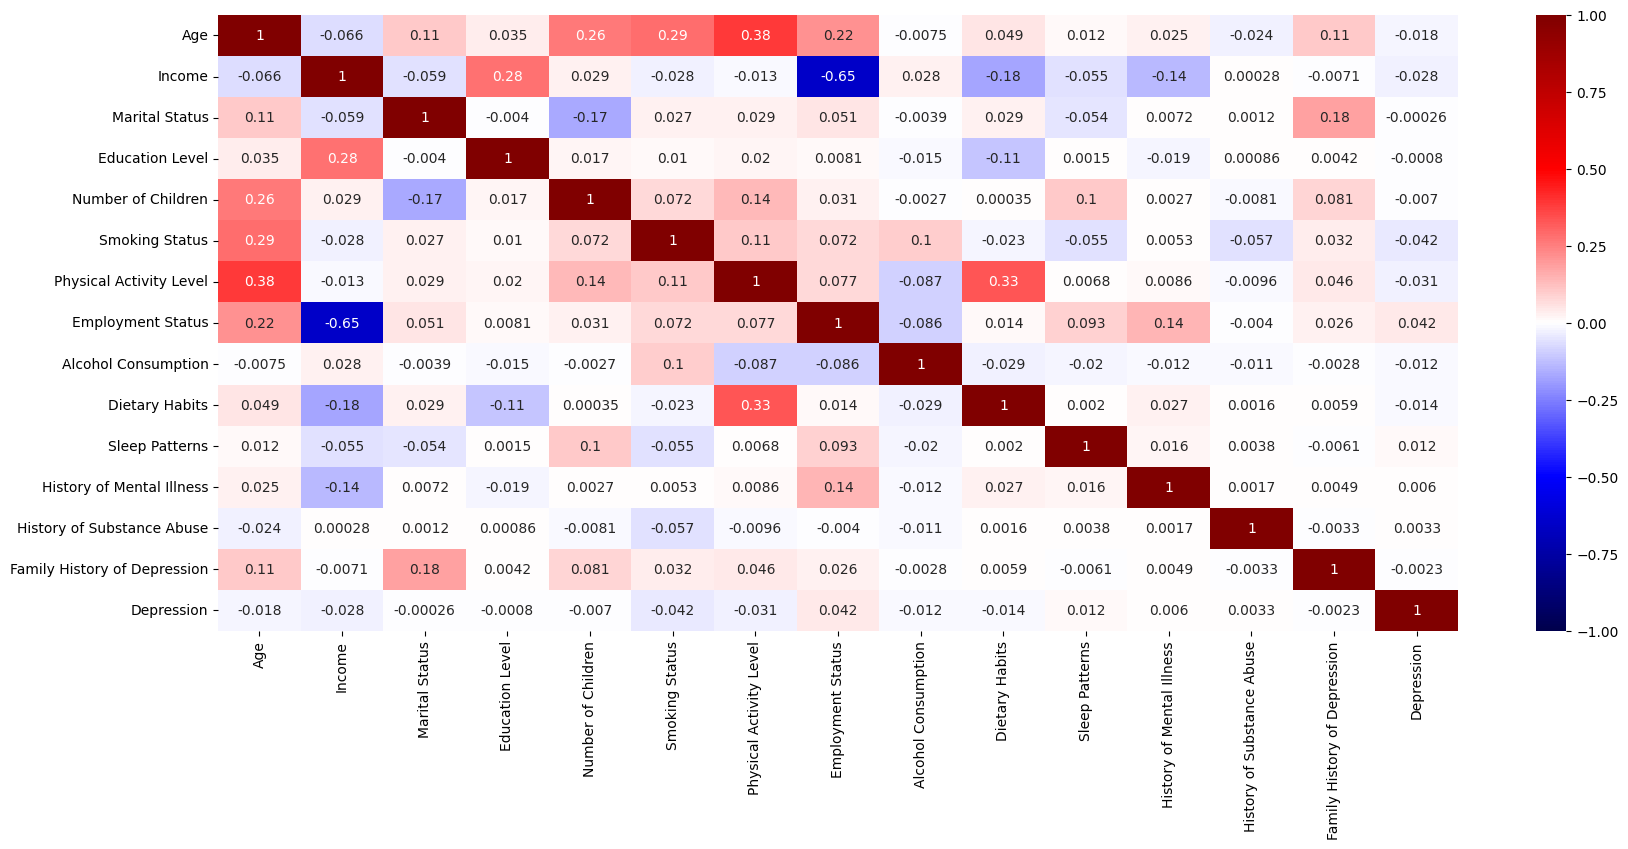

In [57]:
plt.figure(figsize=(20,8))

sns.heatmap(dummy_df.corr(), vmin=-1, annot=True, cmap="seismic")

###
---
###

## Logistic Regression with class weights

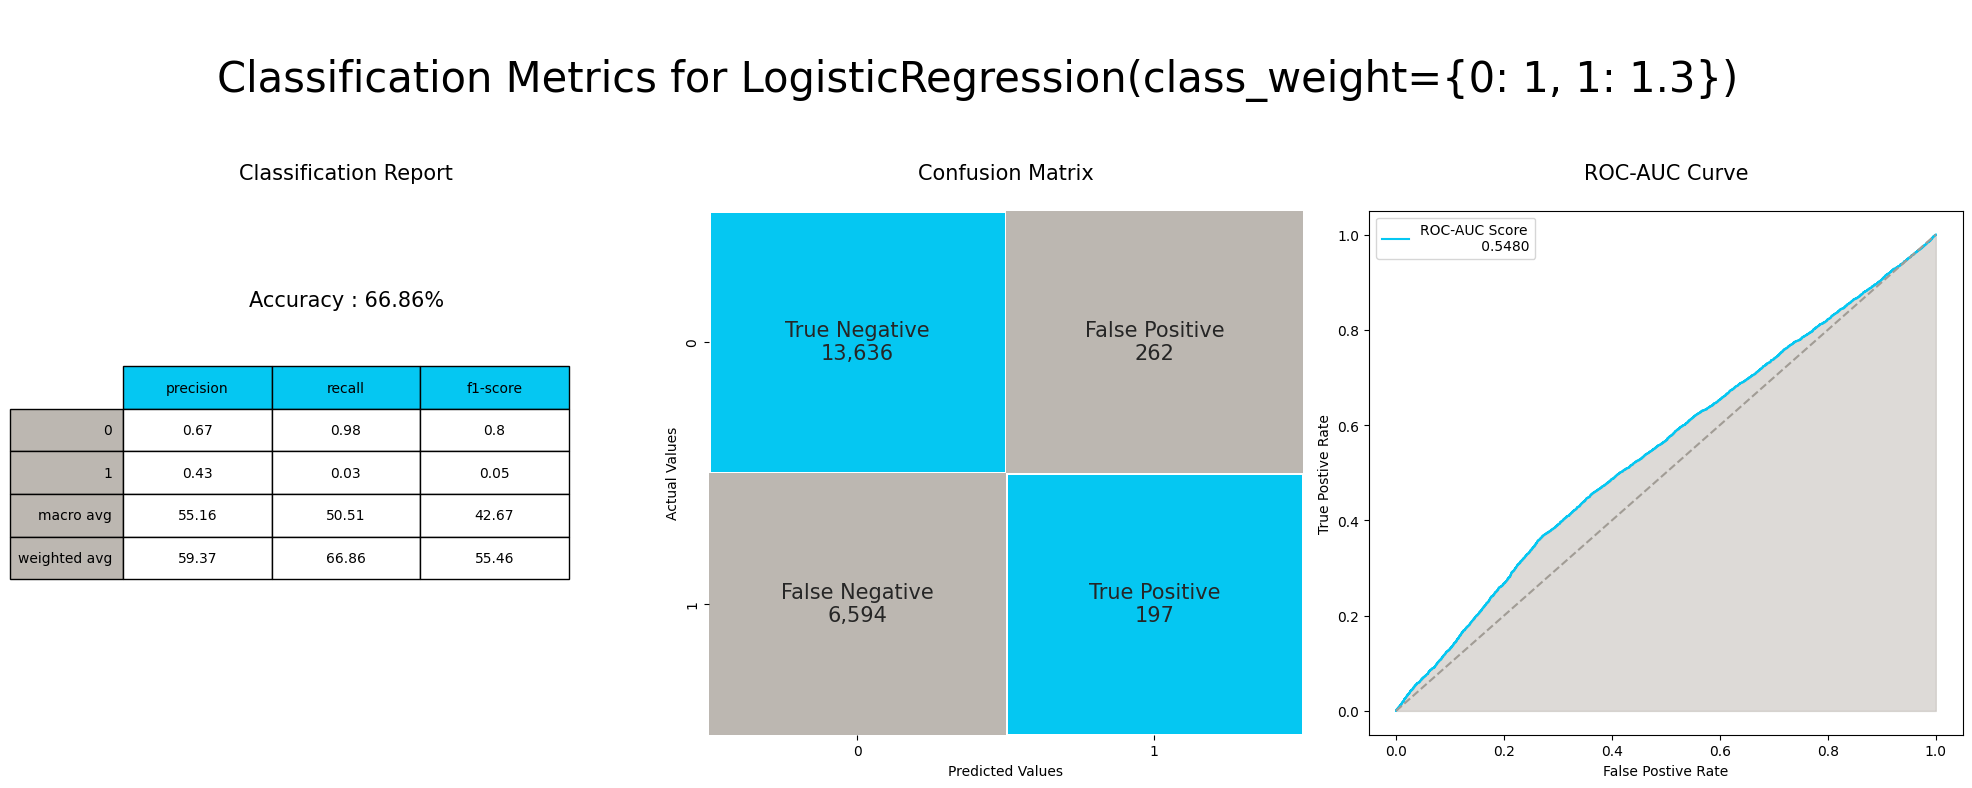

In [58]:
model = LogisticRegression(class_weight={0:1 , 1:1.3}).fit(x_train, y_train)
get_metrics(model, x_test, y_test)

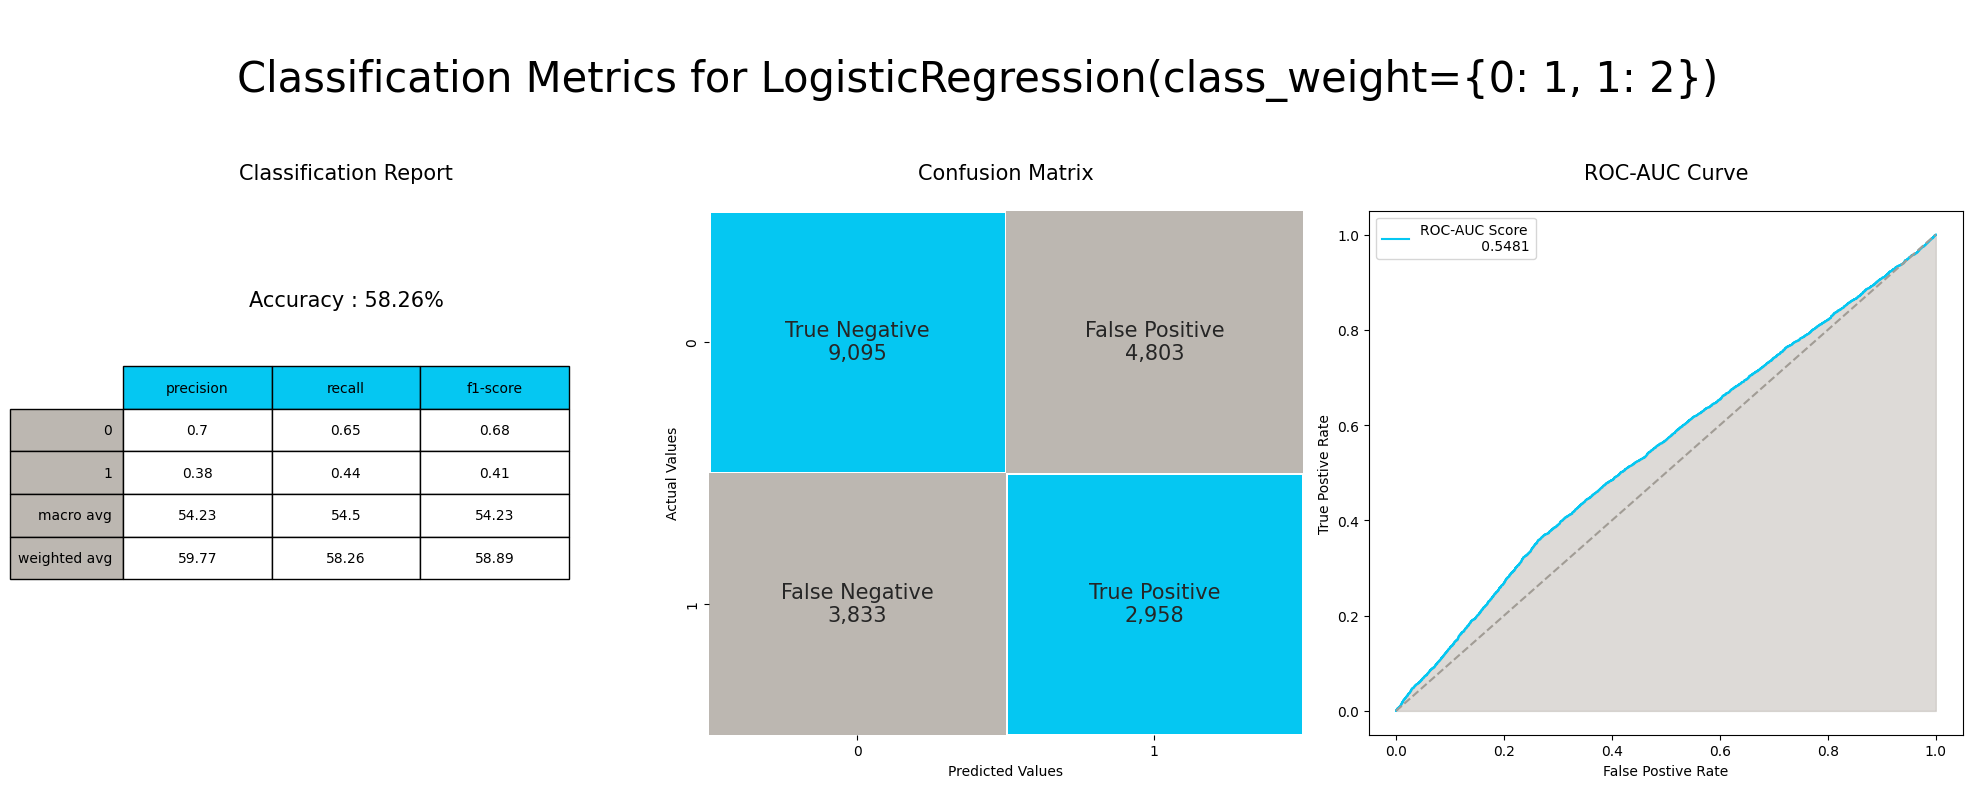

In [59]:
model_lr = LogisticRegression(class_weight={0:1 , 1:2}).fit(x_train, y_train)
get_metrics(model_lr, x_test, y_test)

In [60]:
# with open("LogReg_Model_V2.pkl", "wb") as file:
#     pickle.dump(model_lr, file)

###
---
###

## Voting Classifier

In [61]:
train_df = x_train.copy()
train_df["Depression"] = pd.DataFrame(y_train).reset_index(drop=True)["Depression"]

In [62]:
D_1_df = train_df[train_df["Depression"] == 1]

In [63]:
D_1_df.head(3)

,Age,Income,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,Number of Children_1,Number of Children_2,Number of Children_3,Number of Children_4,Smoking Status_Former,...,Employment Status_Unemployed,Alcohol Consumption_Low,Alcohol Consumption_Moderate,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Sleep Patterns_Good,Sleep Patterns_Poor,History of Mental Illness_Yes,History of Substance Abuse_Yes,Depression
4,0.919355,0.047102,0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,1,1,0,1
6,0.225806,0.406555,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,1,1
7,0.854839,0.067561,0,0,1,0,0,0,0,1,...,1,0,1,1,0,0,0,0,0,1


In [64]:
D_0_df = train_df[train_df["Depression"] == 0]

In [65]:
D_0_df.head(3)

,Age,Income,Marital Status_Married,Marital Status_Single,Marital Status_Widowed,Number of Children_1,Number of Children_2,Number of Children_3,Number of Children_4,Smoking Status_Former,...,Employment Status_Unemployed,Alcohol Consumption_Low,Alcohol Consumption_Moderate,Dietary Habits_Moderate,Dietary Habits_Unhealthy,Sleep Patterns_Good,Sleep Patterns_Poor,History of Mental Illness_Yes,History of Substance Abuse_Yes,Depression
0,0.500000,0.499308,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,0.661290,0.116026,1,0,0,1,0,0,0,0,...,0,0,1,1,0,0,0,1,1,0
2,0.967742,0.139655,1,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0


In [66]:
D_1_df.shape, D_0_df.shape

((129416, 23), (263663, 23))

In [67]:
predicts = pd.DataFrame({"Actual":y_test})
models = pd.DataFrame()
list_of_models = dict()

for i in range(11):
    D_1 = D_1_df.sample(frac=0.6, random_state=np.random.randint(1, 45781236))
    D_0 = D_0_df.sample(n=D_1.shape[0], random_state=np.random.randint(1, 45781236))
    mini_data = pd.concat([D_0, D_1]).sample(frac=1)
    mini_y_train = mini_data["Depression"]
    mini_x_train = mini_data.drop(columns="Depression")
    mini_model = XGBClassifier().fit(mini_x_train, mini_y_train)
    list_of_models[f"Model {i+1}"] = mini_model
    predicts[f"Model {i+1} Prediction"] = mini_model.predict(x_test)
    mets = precision_recall_fscore_support(y_test, mini_model.predict(x_test))
    models = models._append(
    {
        "Model":f"D_0_df{i+1}",
        "Precision_0":mets[0][0],
        "Precision_1":mets[0][1],
        "Recall_0":mets[1][0],
        "Recall_1":mets[1][1],
        "Accuracy":accuracy_score(y_test, mini_model.predict(x_test))
    }, ignore_index=True)
    print(f"...........Done Model {i+1}")

...........Done Model 1
...........Done Model 2
...........Done Model 3
...........Done Model 4
...........Done Model 5
...........Done Model 6
...........Done Model 7
...........Done Model 8
...........Done Model 9
...........Done Model 10
...........Done Model 11


In [68]:
predicts.head(3)

,Actual,Model 1 Prediction,Model 2 Prediction,Model 3 Prediction,Model 4 Prediction,Model 5 Prediction,Model 6 Prediction,Model 7 Prediction,Model 8 Prediction,Model 9 Prediction,Model 10 Prediction,Model 11 Prediction
366559,0,1,1,0,1,1,1,1,1,1,0,1
66432,1,1,1,1,1,1,1,1,1,1,1,1
243274,0,0,0,0,1,1,1,0,1,0,0,0


In [69]:
models

,Model,Precision_0,Precision_1,Recall_0,Recall_1,Accuracy
0,D_0_df1,0.671386,0.328112,0.259318,0.740244,0.417178
1,D_0_df2,0.663903,0.325363,0.265074,0.725372,0.416163
2,D_0_df3,0.673400,0.330195,0.544467,0.459579,0.516603
3,D_0_df4,0.678987,0.329905,0.189020,0.817111,0.395186
4,D_0_df5,0.685197,0.329328,0.076270,0.928287,0.355938
5,D_0_df6,0.669693,0.327610,0.233559,0.764247,0.407753
6,D_0_df7,0.696217,0.334676,0.215858,0.807245,0.409976
7,D_0_df8,0.685719,0.334827,0.327169,0.693123,0.447291
8,D_0_df9,0.666506,0.326920,0.199597,0.795612,0.395234
9,D_0_df10,0.678671,0.335210,0.507123,0.508614,0.507613


In [70]:
model = VotingClassifier(estimators=list(list_of_models.items()), voting="soft", verbose=True).fit(x_train, y_train)

[Voting] ................. (1 of 11) Processing Model 1, total=   1.1s
[Voting] ................. (2 of 11) Processing Model 2, total=   1.1s
[Voting] ................. (3 of 11) Processing Model 3, total=   1.1s
[Voting] ................. (4 of 11) Processing Model 4, total=   1.1s
[Voting] ................. (5 of 11) Processing Model 5, total=   1.1s
[Voting] ................. (6 of 11) Processing Model 6, total=   1.1s
[Voting] ................. (7 of 11) Processing Model 7, total=   1.0s
[Voting] ................. (8 of 11) Processing Model 8, total=   1.1s
[Voting] ................. (9 of 11) Processing Model 9, total=   1.1s
[Voting] ............... (10 of 11) Processing Model 10, total=   1.1s
[Voting] ............... (11 of 11) Processing Model 11, total=   1.1s


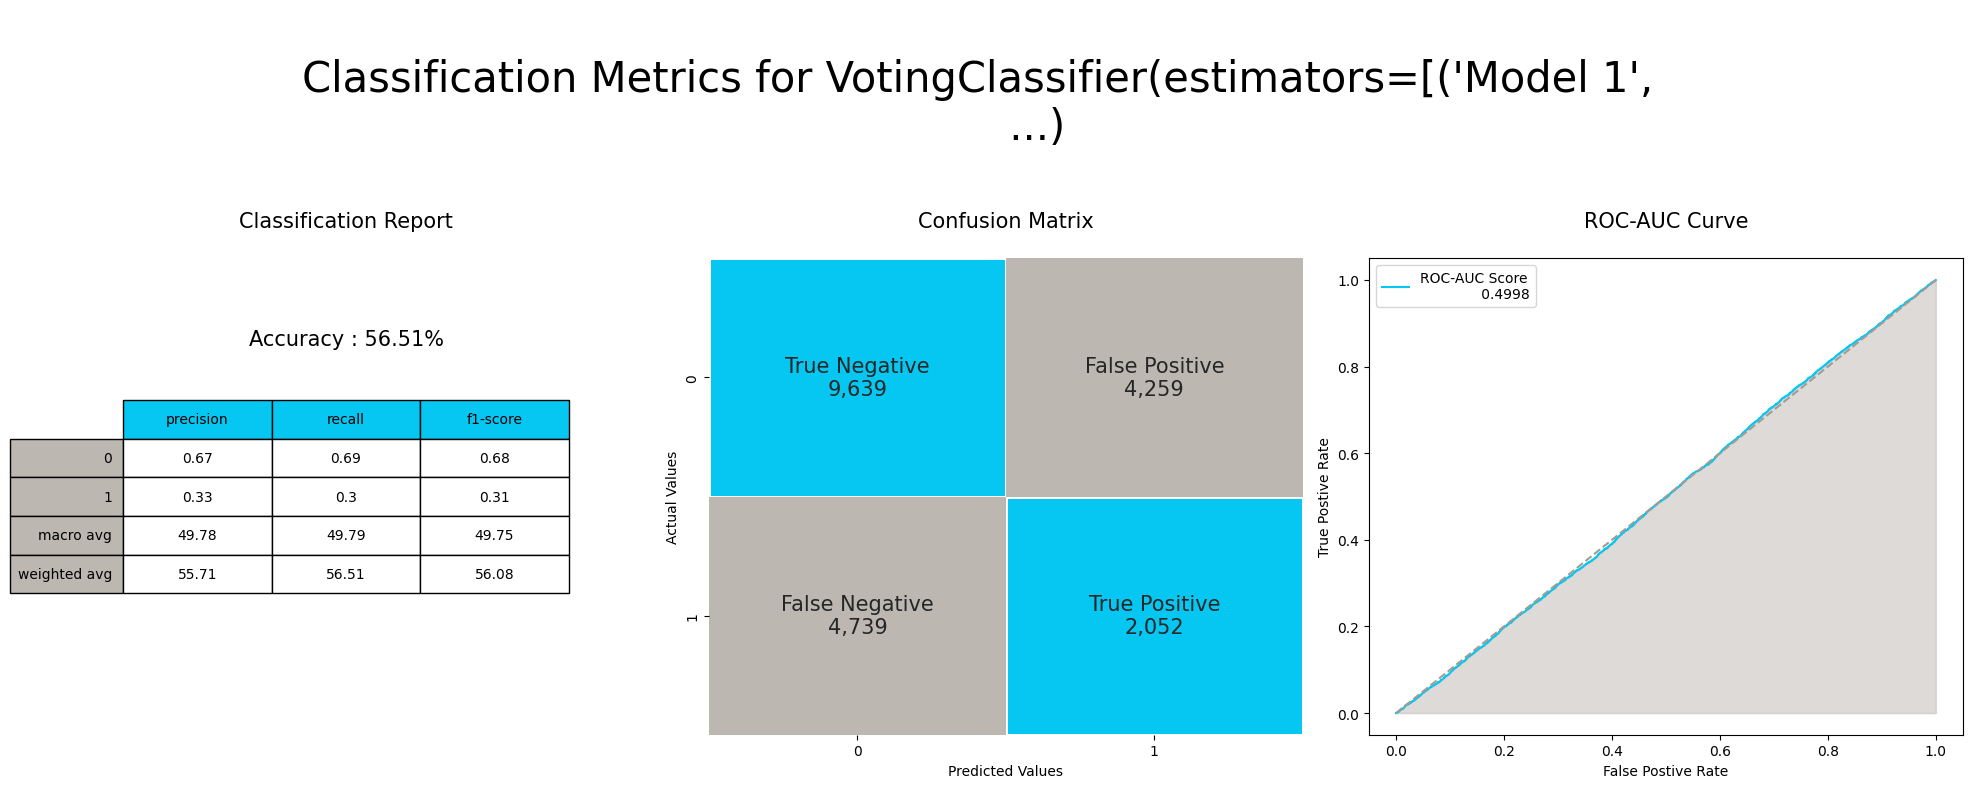

In [71]:
get_metrics(model, x_test, y_test)

###
---
###

## SMOTE

In [72]:
parquet_df["Depression"].value_counts()

Depression
No     277561
Yes    136207
Name: count, dtype: int64

In [73]:
from imblearn.over_sampling import SMOTE

In [74]:
x_train_SMOTE, y_train_SMOTE = SMOTE(sampling_strategy={1:240451}, random_state=30, k_neighbors=1).fit_resample(x_train, y_train)

In [75]:
model_SMOTE = XGBClassifier().fit(x_train_SMOTE, y_train_SMOTE)

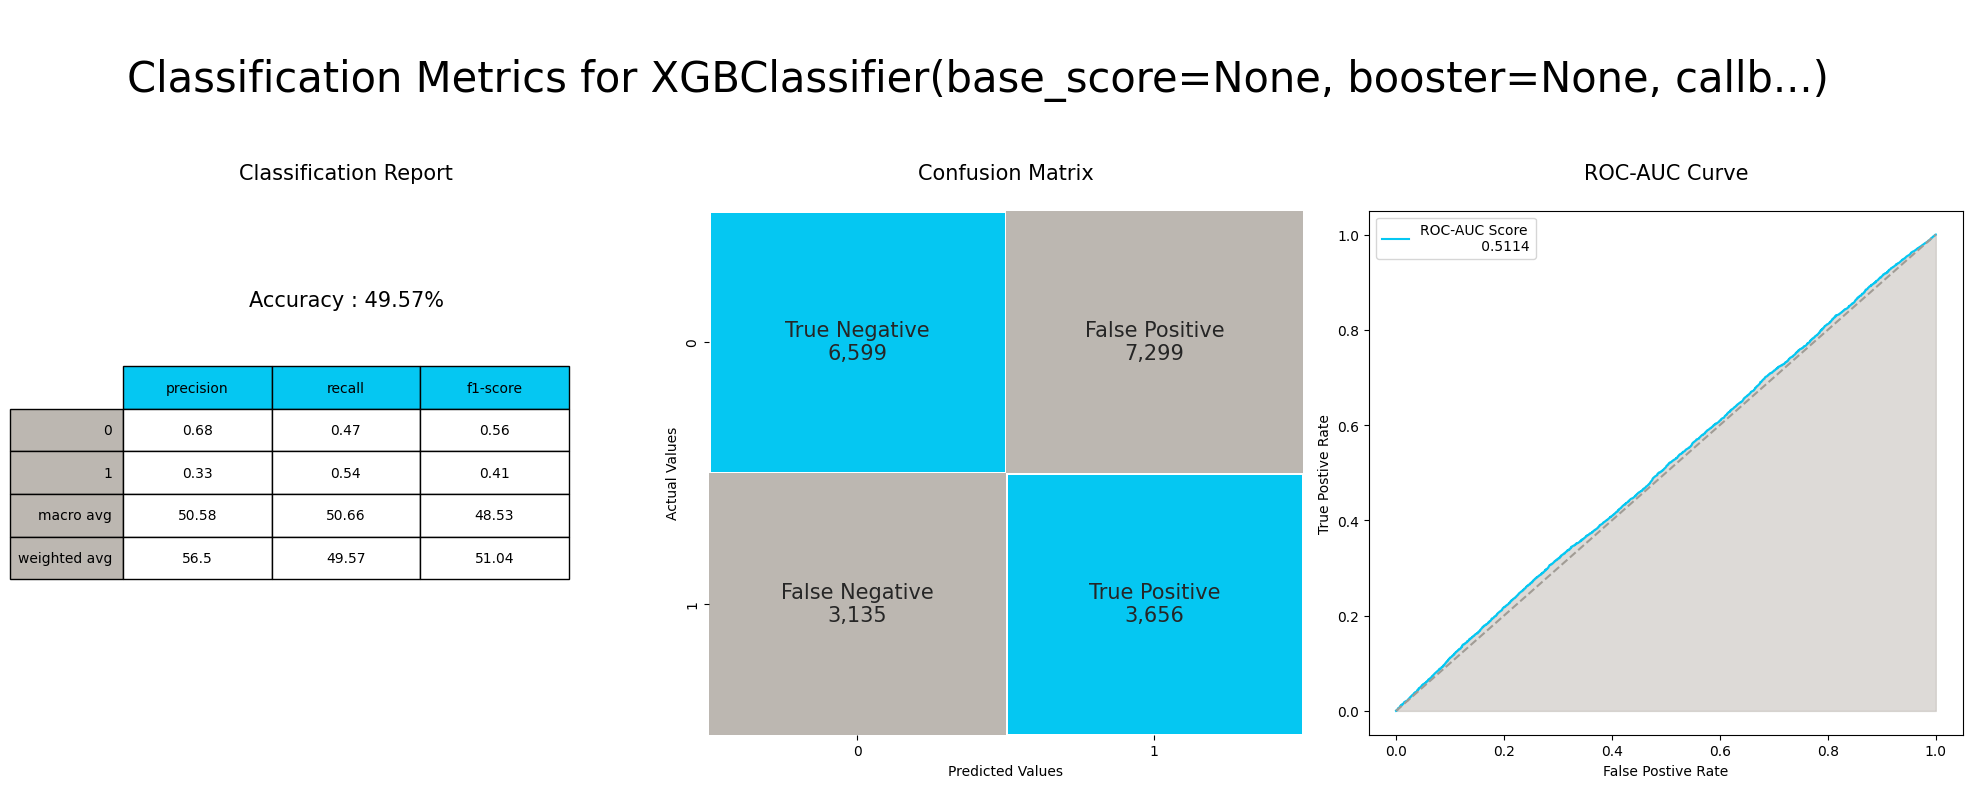

In [76]:
get_metrics(model_SMOTE, x_test, y_test)

###
---
###

## Seperate Models for Numeric & Categorical

In [77]:
num_df = parquet_df.select_dtypes(include='number')

In [78]:
num_df.head()

,Age,Income
0,31,26265.67
1,55,42710.36
2,78,125332.79
3,58,9992.78
4,18,8595.08


In [79]:
x_train, x_test, y_train, y_test = train_test_split(num_df.drop(columns="Depression"), num_df["Depression"], test_size=0.05, random_state=5)

KeyError: "['Depression'] not found in axis"

In [ ]:
print(f'''
x_train shape : {x_train.shape}
x_test shape : {x_test.shape}
y_train shape : {y_train.shape}
y_test shape : {y_test.shape}
''')

In [ ]:
x_test.head()

In [ ]:
x_train, x_test = do_scaling(x_train, x_test)

In [ ]:
cat_df = parquet_df.select_dtypes(exclude='number')
cat_df = pd.concat([cat_df, parquet_df["Depression"]], axis=1)

In [ ]:
cat_df.head()